<a href="https://colab.research.google.com/github/alrz199/transformers/blob/main/transformers_for_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict the IBM stock price based on the price of other relevant companies, like Google, Apple, etc, using transformer models.

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
# Create a ticker object for a specific stock
# 'GooG' , 'AAPL', 'NVDA' , 'IBM' , 'MSFT', 'AMZN', 'CRM' , 'INTC', 'ADBE'
# Get historical data for the stock
def history_loader(ticker_str):
  ticker = yf.Ticker(ticker_str)
  historical_data = ticker.history(period='1d', start='2010-01-01', end='2021-12-30')
  historical_data = historical_data.reset_index()
  historical_data['Date'] = pd.to_datetime(historical_data['Date']).dt.date
  historical_data = historical_data.sort_values(by ='Date')[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
  return historical_data
google = history_loader('GooG')
google['hist'] = 'google'
apple = history_loader('AAPL')
apple['hist'] = 'apple'
msoft = history_loader('MSFT')
msoft['hist'] = 'msoft'
nvda = history_loader('NVDA')
nvda['hist'] = 'nvda'
ibm = history_loader('IBM')
ibm['hist'] = 'ibm'
amzn = history_loader('AMZN')
amzn['hist'] = 'amzn'
crm = history_loader('CRM')
crm['hist'] = 'crm'
intel = history_loader('INTC')
intel['hist'] = 'intel'
adobe = history_loader('ADBE')
adobe['hist'] = 'adobe'

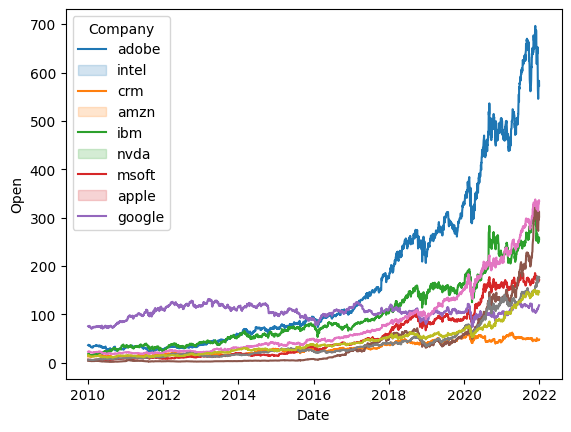

In [ ]:
# plot the data
import matplotlib.pyplot as plt
sns.lineplot(data=adobe, x="Date", y="Open")
sns.lineplot(data=intel, x="Date", y="Open")
sns.lineplot(data=crm, x="Date", y="Open")
sns.lineplot(data=amzn, x="Date", y="Open")
sns.lineplot(data=ibm, x="Date", y="Open")
sns.lineplot(data=nvda, x="Date", y="Open")
sns.lineplot(data=msoft, x="Date", y="Open")
sns.lineplot(data=apple, x="Date", y="Open")
sns.lineplot(data=google, x="Date", y="Open")
plt.legend(title='Company', loc='upper left', labels=['adobe', 'intel','crm','amzn','ibm','nvda','msoft','apple','google'])
plt.rcParams['figure.figsize'] = [4, 4]
plt.show()

In [ ]:
# check the shape of the data
google.shape,apple.shape,msoft.shape,nvda.shape,ibm.shape,amzn.shape,crm.shape,intel.shape,adobe.shape

((3019, 7),
 (3019, 7),
 (3019, 7),
 (3019, 7),
 (3019, 7),
 (3019, 7),
 (3019, 7),
 (3019, 7),
 (3019, 7))

In [ ]:
# we will concat data to normalize all values
train_f = pd.concat([google, apple, msoft, nvda, amzn, crm, intel,adobe],axis=0)
train_f.shape

(24152, 7)

In [ ]:
train_f.tail(2)

,Date,Open,High,Low,Close,Volume,hist
3017,2021-12-28,582.840027,582.880005,568.349976,569.359985,2107800,adobe
3018,2021-12-29,573.330017,576.960022,562.780029,569.289978,2484200,adobe


In [ ]:
google.head(2)

,Date,Open,High,Low,Close,Volume,hist
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,78541293,google
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,120638494,google


In [ ]:
#we should normalize data based on the values in the train set; let's assume our train set covers samples until
# 2021/09/01
import datetime
train_f[train_f["Date"]<datetime.date(year=2021,month=9,day=1)].tail(2)

,Date,Open,High,Low,Close,Volume,hist
2934,2021-08-30,659.780029,667.669983,659.780029,665.989990,1341500,adobe
2935,2021-08-31,667.900024,667.900024,660.460022,663.700012,1877800,adobe


In [ ]:
# create our target values
ibm['target'] = (ibm['High']+ibm['Low'])/2

In [ ]:
# let's check all tables have data for same days
dfs = [google, apple, msoft, nvda, amzn, crm, intel,adobe,ibm]
for df in dfs:
  print(google.merge(msoft,on='Date').shape)

(3019, 13)
(3019, 13)
(3019, 13)
(3019, 13)
(3019, 13)
(3019, 13)
(3019, 13)
(3019, 13)
(3019, 13)


In [ ]:
#normalizing our features
dfs = [google, apple, msoft, nvda, amzn, crm, intel,adobe]
for c in train_f.columns[1:6]:
    train_f[c] = train_f[c]/(train_f[train_f["Date"]<datetime.date(year=2021,month=9,day=1)][c].max())

In [ ]:
#normalizing our target vector
ibm['target'] = ibm['target']/ibm[ibm["Date"]<datetime.date(year=2021,month=9,day=1)]['target'].max()

In [ ]:
train_f.head(3)

,Date,Open,High,Low,Close,Volume,hist
0,2010-01-04,0.023380,0.023475,0.023541,0.023439,0.041755,google
1,2010-01-05,0.023388,0.023413,0.023439,0.023336,0.064135,google
2,2010-01-06,0.023339,0.023339,0.022866,0.022748,0.084925,google


In [ ]:
# now we should concat everything and come up with a final dataset
train_f['target'] = ibm['target']
d1 = train_f[(train_f["hist"]=='google')][['Open','High','Low','Close','Volume']]
d2 = train_f[(train_f["hist"]=='apple')][['Open','High','Low','Close','Volume']]
d3 = train_f[(train_f["hist"]=='msoft')][['Open','High','Low','Close','Volume']]
d4 = train_f[(train_f["hist"]=='nvda')][['Open','High','Low','Close','Volume']]
d5 = train_f[(train_f["hist"]=='amzn')][['Open','High','Low','Close','Volume']]
d6 = train_f[(train_f["hist"]=='crm')] [['Open','High','Low','Close','Volume']]
d7 = train_f[(train_f["hist"]=='intel')][['Open','High','Low','Close','Volume']]
d8 = train_f[(train_f["hist"]=='adobe')][['Open','High','Low','Close','Volume']]
data = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8],axis=1)
data['target'] = ibm['target']
data['date'] = ibm['Date']
data.shape

(3019, 42)

<Axes: xlabel='Date', ylabel='Close'>

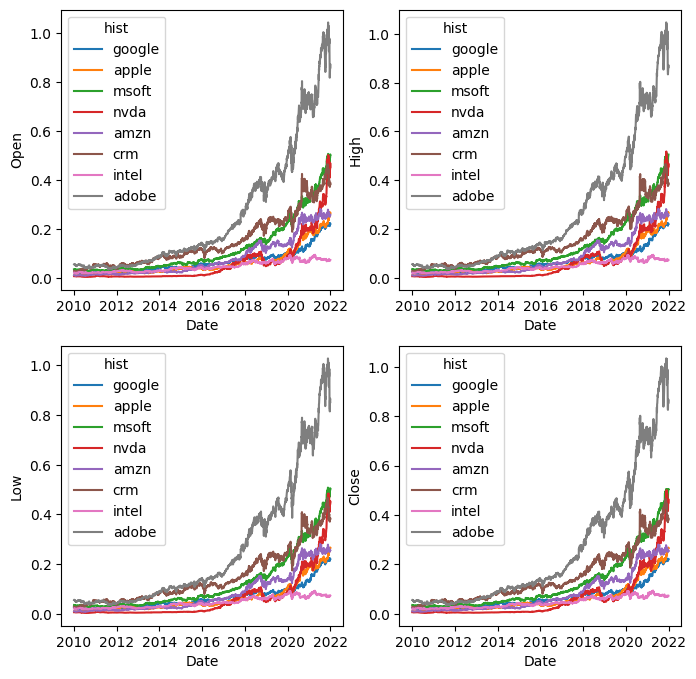

In [ ]:
#let's plot the data
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
fig, axs = plt.subplots(ncols=2,nrows=2)
sns.lineplot(data=train_f, x="Date", y="Open", hue="hist",ax=axs[0,0])
sns.lineplot(data=train_f, x="Date", y="High", hue="hist",ax=axs[0,1])
sns.lineplot(data=train_f, x="Date", y="Low", hue="hist", ax=axs[1,0])
sns.lineplot(data=train_f, x="Date", y="Close", hue="hist",ax=axs[1,1])

In [ ]:
data.iloc[:,0:41].head(3)

,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume,...,High,Low,Close,Volume,Open,High,Low,Close,Volume,target
0,0.023380,0.023475,0.023541,0.023439,0.041755,0.009662,0.009710,0.009723,0.009716,0.262483,...,0.020600,0.020535,0.020511,0.025413,0.054873,0.055847,0.055492,0.055692,0.002504,0.579601
1,0.023388,0.023413,0.023439,0.023336,0.064135,0.009715,0.009760,0.009763,0.009733,0.319992,...,0.020561,0.020406,0.020502,0.027835,0.055457,0.056595,0.055825,0.056607,0.003779,0.575493
2,0.023339,0.023339,0.022866,0.022748,0.084925,0.009705,0.009743,0.009648,0.009578,0.293546,...,0.020502,0.020475,0.020433,0.021285,0.055892,0.056505,0.056324,0.056487,0.002837,0.574065


In [ ]:
data[data["date"] >= datetime.date(year=2021,month=9,day=1)].iloc[:,0:41].shape

(83, 41)

In [ ]:
#devide data into train and test...it is worth noting that we should use the previous targets in our x sequence
x_train = data[data["date"] < datetime.date(year=2021,month=9,day=1)].iloc[:,0:41].values
y_train = data[data["date"] < datetime.date(year=2021,month=9,day=1)]['target'].values
x_test = data[data["date"] >= datetime.date(year=2021,month=9,day=1)].iloc[:,0:41].values
y_test = data[data["date"] >= datetime.date(year=2021,month=9,day=1)]['target'].values

In [ ]:
x_test.shape

(83, 41)

In [ ]:
import torch
# now we should cerate sequences of observations
# we will use a 30 days sequence to predict the target of the next day
x_train = torch.tensor([x_train[i:i+30] for i in range(2900)],dtype=torch.float)
y_train =torch.tensor([y_train[i+30] for i in range(2900)],dtype=torch.float)
x_test = torch.tensor([x_test[i:i+30] for i in range(45)],dtype=torch.float)
y_test = torch.tensor([y_test[i+30] for i in range(45)],dtype=torch.float)

<ipython-input-20-e04f5459081c>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  x_train = torch.tensor([x_train[i:i+30] for i in range(2900)],dtype=torch.float)


In [ ]:
y_test.shape

torch.Size([45])

In [ ]:
from torch.utils.data import Dataset, DataLoader
#creating dataloader and dataset
class Dataset_creator(Dataset):
    def __init__(self, x,y):
        self.x = x
        self.y = y
    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__ (self, idx):
        return self.x[idx], self.y[idx]

    # we can call len(dataset) to return the size
    def __len__(self):
        return len(self.y)

In [ ]:
test_dataset = Dataset_creator(x_test, y_test)
test_data_loader = DataLoader(dataset=test_dataset,
                          batch_size=16,
                          shuffle=False)

In [ ]:
train_dataset = Dataset_creator(x_train, y_train)
train_data_loader = DataLoader(dataset=train_dataset,
                          batch_size=64,
                          shuffle=False)

In [ ]:
# look at one random sample
dataiter = iter(train_data_loader)
data = next(dataiter)
x,y  = data
print(x.shape, y.shape)

torch.Size([64, 30, 41]) torch.Size([64])


In [ ]:
# look at one random sample
dataiter = iter(test_data_loader)
data = next(dataiter)
x,y  = data
print(x.shape, y.shape)

torch.Size([16, 30, 41]) torch.Size([16])


In [ ]:
import math
from torch import nn
#positional encoding... we use sin(x) and cos(x) to add information tied to the position in the sequence
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.d_model = d_model
        self.max_len = max_len
        #self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Arguments:
            x: Tensor, shape ``[seq_len, batch_size, embedding_dim]``
        """
        #position = torch.arange(self.max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, self.d_model, 2) * (-math.log(10000.0) / self.d_model))
        pe = torch.zeros(self.max_len, 1, self.d_model)
        for position in range(pe.shape[1]):
          if position%2==0:
            pe[:,0,position] = torch.sin(position * div_term[position//2])
          if position%2==1:
            pe[:,0,position] = torch.cos(position * div_term[position//2])
        x = x + pe[:x.size(0)]
        return self.dropout(x)

In [ ]:
pos_encoder = PositionalEncoding(41, 0.1)
pos_encoder(x.reshape(30,16,41)).shape

torch.Size([30, 16, 41])

In [ ]:
x.shape,y.shape

(torch.Size([16, 30, 41]), torch.Size([16]))

In [ ]:
!pip --quiet install pytorch-lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 16.9 MB/s eta 0:00:00


In [ ]:
x.shape
z = torch.zeros(x.shape[0],30,1)
torch.cat([x, z], 2).shape

torch.Size([16, 30, 42])

In [ ]:
from pytorch_lightning import LightningModule, Trainer
from torch.nn import functional as F
import torch.nn as nn
batch_size = 64
learning_rate = 0.001

In [ ]:
# creating our model
# we will use a transformer encoder to add context to the input sequence, in order to have a multi-head attention architecture,
# we add a zero to the end of the feature vector for x
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
torch.set_grad_enabled(True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class nnn(LightningModule):

    def __init__(self):
        super(nnn, self).__init__()
        self.fc2 = nn.Linear(42*30, 1)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=42, nhead=6)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=3)
        self.pos_encoder = PositionalEncoding(42, 0.1)
    def forward(self, x):
        batch = x.shape[0]
        z = torch.zeros(batch,30,1)
        x = torch.cat([x, z], 2)
        x = x.reshape(30,batch,42)#seq,batch,dim
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.view(batch,30*42)# preparing data for the linear layer
        x = F.leaky_relu(self.fc2(x))
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self.forward(x)
        loss =  nn.MSELoss()(out,y)
        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        #x=x.float()
        out = self.forward(x)
        loss =  nn.MSELoss()(out,y)
        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("val_loss", loss, prog_bar=True)
        return loss
# we should have a cosine scheduler in order to prevent adam from producing undesirable outcomes
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        return {
        "optimizer": optimizer,
        "lr_scheduler": {
          "scheduler":  CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2)}}

In [ ]:
# train the model
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
logger = TensorBoardLogger("tb_logs", name="my_model")
model=nnn()
trainer = Trainer(
    max_epochs=10,
    callbacks=[EarlyStopping(monitor="val_loss")])

# Train the model ⚡
trainer.fit(model, train_data_loader,val_dataloaders=test_data_loader)
print('Finished Training')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                    | Params
----------------------------------------------------------------
0 | fc2                 | Linear                  | 1.3 K 
1 | encoder_layer       | TransformerEncoderLayer | 181 K 
2 | t

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (46) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Finished Training


In [ ]:
# Start tensorboard.
%load_ext tensorboard
%tensorboard --logdir lightning_logs/